<a href="https://colab.research.google.com/github/shoubhikchakraborty/ThinkStats2/blob/master/Air_bnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math        
import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sklearn

In [0]:
train=pd.read_csv('/content/drive/My Drive/air_bnb/train_users_2.csv')

In [0]:
age_gender=pd.read_csv('/content/drive/My Drive/air_bnb/age_gender_bkts.csv')

In [0]:
countries=pd.read_csv('/content/drive/My Drive/air_bnb/countries.csv')

In [0]:
session=pd.read_csv('/content/drive/My Drive/air_bnb/sessions.csv')

In [9]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [10]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [11]:
train.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

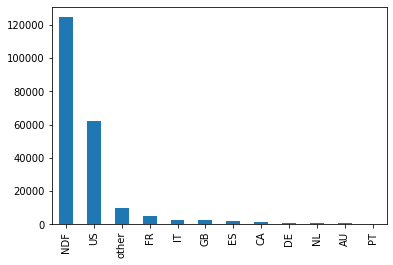

In [12]:
train['country_destination'].value_counts().plot(kind='bar')

The dataset is imbalanced as it has a lot of rare labels in the country_destination column

In [13]:
train['country_destination'].describe()

count     213451
unique        12
top          NDF
freq      124543
Name: country_destination, dtype: object

In [14]:
train['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [15]:
train['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [16]:
train['gender'].describe()

count        213451
unique            4
top       -unknown-
freq          95688
Name: gender, dtype: object

In [0]:
train['gender'].replace(to_replace='-unknown-',value=np.nan,inplace=True)

In [18]:
len(train['age'].unique())

128

In [19]:
train['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [0]:
train.age=train.age.dropna().astype('int64')

In [21]:
c=0
for var in train.age:
    if var>100 and (math.floor(math.log10(var))+1)<4:
        c=c+1
        print(var)
print("total ",c)  

# we have total 1556 ages greater than 100 

104.0
105.0
105.0
105.0
104.0
105.0
101.0
105.0
115.0
104.0
105.0
105.0
107.0
105.0
110.0
105.0
105.0
105.0
105.0
102.0
105.0
105.0
105.0
105.0
107.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
105.0
103.0
105.0
105.0
105.0
105.0
105.0
110.0
105.0
105.0
105.0
104.0
103.0
105.0
110.0
103.0
105.0
105.0
105.0
110.0
105.0
105.0
110.0
110.0
105.0
107.0
102.0
105.0
110.0
105.0
101.0
107.0
104.0
115.0
105.0
105.0
105.0
105.0
110.0
110.0
110.0
103.0
115.0
107.0
106.0
110.0
105.0
105.0
105.0
105.0
110.0
103.0
104.0
110.0
101.0
105.0
101.0
108.0
110.0
104.0
115.0
105.0
105.0
104.0
105.0
105.0
113.0
105.0
105.0
103.0
110.0
107.0
105.0
103.0
105.0
105.0
109.0
105.0
105.0
104.0
110.0
106.0
105.0
110.0
105.0
110.0
103.0
102.0
110.0
110.0
105.0
104.0
110.0
105.0
105.0
105.0
105.0
110.0
105.0
113.0
105.0
105.0
105.0
105.0
105.0
110.0
104.0
105.0
105.0
105.0
109.0
105.0
109.0
101.0
105.0
110.0
105.0
105.0
105.0
109.0
105.0
105.0
110.0
110.0
105.0
106.0
102.

In [22]:
c=0
for var in train.age.dropna():
    if (math.floor(math.log10(var))+1)>3:
        c+=1
        print(var)
print("total ",c)

# A total of 779 includes year

2014.0
2014.0
2014.0
2013.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2013.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2013.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2013.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2013.0
2014.0
2014.0
2013.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2013.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2014.0
2013.0

In [0]:
train.loc[train.age>150,'age']=np.nan
train.loc[train.age<0,'age']=np.nan

In [24]:
print("missing values in the dataset")
for var in train:
    print(var,"----> ",train[var].isnull().sum()*100/len(train[var]),"%")

missing values in the dataset
id ---->  0.0 %
date_account_created ---->  0.0 %
timestamp_first_active ---->  0.0 %
date_first_booking ---->  58.347349040294965 %
gender ---->  44.82902399145471 %
age ---->  41.587530627638195 %
signup_method ---->  0.0 %
signup_flow ---->  0.0 %
language ---->  0.0 %
affiliate_channel ---->  0.0 %
affiliate_provider ---->  0.0 %
first_affiliate_tracked ---->  2.84140153946339 %
signup_app ---->  0.0 %
first_device_type ---->  0.0 %
first_browser ---->  0.0 %
country_destination ---->  0.0 %


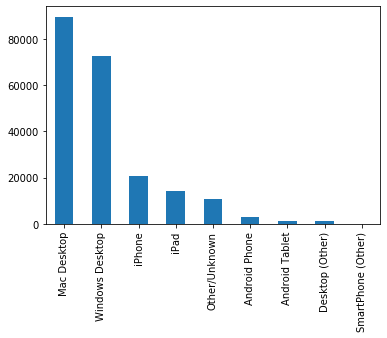

In [25]:
train.first_device_type.value_counts().plot(kind='bar')

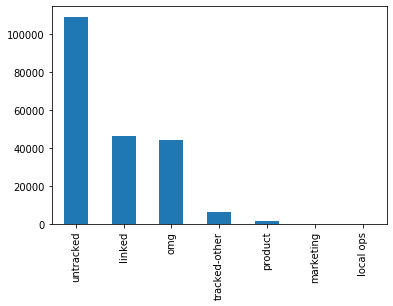

In [26]:
train.first_affiliate_tracked.value_counts().plot(kind='bar')

In [0]:
categorical=[var for var in train.columns if train[var].dtypes=='object']

In [0]:
date=[var for var in categorical if 'date' in var]

In [0]:
categorical.remove('date_account_created')
categorical.remove('date_first_booking')

In [30]:
numerical=[var for var in train.columns if train[var].dtypes!='object']
numerical

['timestamp_first_active', 'age', 'signup_flow']

In [31]:
train['gender'].value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

In [32]:
train['signup_method'].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [33]:
train[numerical].corr()

,timestamp_first_active,age,signup_flow
timestamp_first_active,1.000000,-0.060884,0.196702
age,-0.060884,1.000000,-0.083565
signup_flow,0.196702,-0.083565,1.000000


In [34]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [35]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [36]:
age_gender.dtypes

age_bucket                  object
country_destination         object
gender                      object
population_in_thousands    float64
year                       float64
dtype: object

In [37]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [0]:
train['account_created']=pd.to_datetime(train.date_account_created)

In [0]:
train['first_active']=pd.to_datetime(train.timestamp_first_active.astype(str))

In [0]:
train['account_created_qtr']=train.account_created.dt.quarter

In [0]:
train['account_created_yr']=train.account_created.dt.year

In [0]:
train['first_active_qtr']=train['first_active'].dt.quarter

In [0]:
train['first_active_yr']=train['first_active'].dt.year

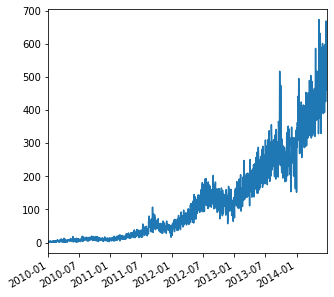

In [44]:
plt.figure(figsize=(5,5))
train.account_created.value_counts().plot()

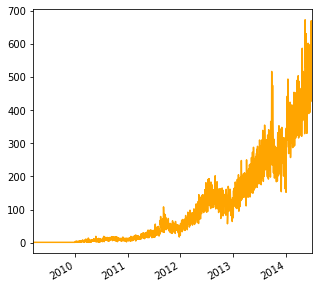

In [45]:
plt.figure(figsize=(5,5))
date_first_active = train.first_active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
date_first_active.value_counts().plot (color='orange')

In [0]:
date_account_created = pd.DatetimeIndex(train['date_account_created'])
date_first_active = pd.DatetimeIndex(train['timestamp_first_active'])
date_first_booking = pd.DatetimeIndex(train['date_first_booking'])

In [0]:
train['time_lag_create'] = (date_first_booking - date_account_created).days
train['time_lag_active'] = (date_first_booking - date_first_active).days

In [48]:
#checking cardinality 
for var in train.columns:
    cardinality = len(pd.Index(train[var]).value_counts())
    print(var + ": " + str(cardinality))
    

id: 213451
date_account_created: 1634
timestamp_first_active: 213451
date_first_booking: 1976
gender: 3
age: 106
signup_method: 3
signup_flow: 17
language: 25
affiliate_channel: 8
affiliate_provider: 18
first_affiliate_tracked: 7
signup_app: 4
first_device_type: 9
first_browser: 52
country_destination: 12
account_created: 1634
first_active: 213451
account_created_qtr: 4
account_created_yr: 5
first_active_qtr: 4
first_active_yr: 6
time_lag_create: 391
time_lag_active: 1976


In [49]:
for var in categorical:
    print(var," : ",train[var].unique())

id  :  ['gxn3p5htnn' '820tgsjxq7' '4ft3gnwmtx' ... '6o3arsjbb4' 'jh95kwisub'
 'nw9fwlyb5f']
gender  :  [nan 'MALE' 'FEMALE' 'OTHER']
signup_method  :  ['facebook' 'basic' 'google']
language  :  ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
affiliate_channel  :  ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
affiliate_provider  :  ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
first_affiliate_tracked  :  ['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
signup_app  :  ['Web' 'Moweb' 'iOS' 'Android']
first_device_type  :  ['Mac Desktop' 'Windows Desktop' 'iPhone' 'Other/Unknown'
 'Desktop (Other)' 'Android Tablet' 'iPad' 'Android Phone'
 'SmartPhone (Other)']
first_browser  :  ['Chrome' 'IE' 'Firefox' 'Sa

In [50]:
s_frac=train.signup_flow.value_counts()/len(train.signup_flow)
s_frac

0     0.771788
25    0.068676
12    0.043706
3     0.041330
2     0.032237
24    0.020276
23    0.013282
1     0.004905
6     0.001410
8     0.001124
21    0.000918
5     0.000169
20    0.000066
16    0.000052
15    0.000047
10    0.000009
4     0.000005
Name: signup_flow, dtype: float64

In [0]:
def non_rare_labels(df,var,tol):
    temp=df.groupby([var])[var].count()/len(df)
    non_rare=[x for x in temp.loc[temp>tol].index.values]
    return non_rare

In [52]:
non_rare_labels(train,'signup_flow',0.004)

[0, 1, 2, 3, 12, 23, 24, 25]

In [0]:
def rare_encoding(df,var,tol):
    freq_cat=non_rare_labels(df,var,tol)
    df[var]=np.where(df[var].isin(freq_cat),df[var],'Rare')
    return df

In [0]:
for var in['signup_flow','first_browser','affiliate_provider']:
    train=rare_encoding(train,var,0.004)

In [0]:
train['first_device_type'].replace(to_replace='Other/Unknown',value='Other',inplace=True)

In [0]:
train['first_browser'].replace(to_replace='-unknown-',value='others',inplace=True)

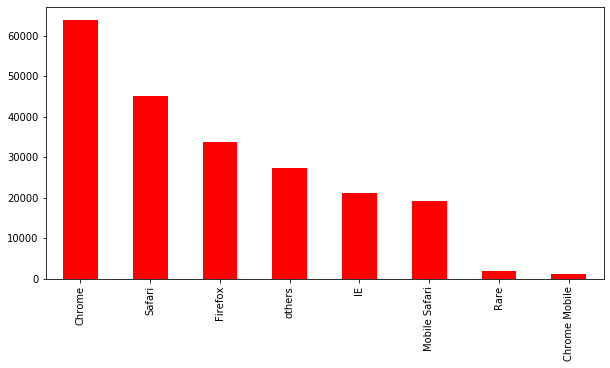

In [57]:
plt.figure(figsize=(10,5))
train.first_browser.value_counts().plot(kind='bar',color='red')


In [58]:
train.language.value_counts()*100/len(train.language)

en    96.656375
zh     0.764578
fr     0.549072
es     0.428670
ko     0.349963
de     0.342936
it     0.240805
ru     0.182243
pt     0.112438
ja     0.105411
sv     0.057156
nl     0.045444
tr     0.029983
da     0.027173
pl     0.025299
cs     0.014992
no     0.014055
th     0.011244
el     0.011244
id     0.010307
hu     0.008433
fi     0.006559
ca     0.002342
is     0.002342
hr     0.000937
Name: language, dtype: float64

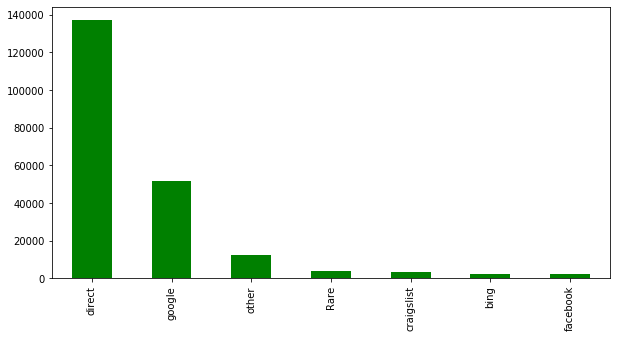

In [59]:
plt.figure(figsize=(10,5))
train.affiliate_provider.value_counts().plot(kind='bar',color='green')

In [60]:
age_gender.dtypes

age_bucket                  object
country_destination         object
gender                      object
population_in_thousands    float64
year                       float64
dtype: object

In [0]:
l=['age_bucket','gender','country_destination']

In [62]:
age_gender.groupby(l)['population_in_thousands'].transform('max')

0          1.0
1          9.0
2         47.0
3        118.0
4        199.0
        ...   
415      115.0
416      541.0
417    10570.0
418     1441.0
419     2442.0
Name: population_in_thousands, Length: 420, dtype: float64

In [63]:
age_gender.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


per country_destination,age_bucket the maximum value of population_in_thousands when gender is male

In [0]:
l1=['age_bucket','gender']

In [65]:
age_gender.loc[(age_gender.country_destination== 'AU')].groupby(l1)['population_in_thousands'].agg('max')

age_bucket  gender
0-4         female    781.0
            male      824.0
10-14       female    707.0
            male      743.0
100+        female      4.0
            male        1.0
15-19       female    737.0
            male      768.0
20-24       female    787.0
            male      820.0
25-29       female    851.0
            male      895.0
30-34       female    865.0
            male      881.0
35-39       female    801.0
            male      797.0
40-44       female    838.0
            male      820.0
45-49       female    793.0
            male      778.0
5-9         female    745.0
            male      784.0
50-54       female    798.0
            male      778.0
55-59       female    739.0
            male      714.0
60-64       female    660.0
            male      636.0
65-69       female    592.0
            male      574.0
70-74       female    438.0
            male      415.0
75-79       female    338.0
            male      298.0
80-84       female    252.0
 

In [66]:
train.loc[(train.country_destination== 'NDF')]['date_first_booking'].unique()

array([nan], dtype=object)

In [0]:
def bivariate_unique(df,col,var1,var2):
    return  df.loc[(df[col]== var1)][var2].unique()

In [68]:
train.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [0]:
for var in age_gender.country_destination:
    #print(var)
    df=age_gender.loc[(age_gender.country_destination== var)].groupby(l1)['population_in_thousands'].value_counts()

In [70]:
df

age_bucket  gender  population_in_thousands
0-4         female  10306.0                    1
            male    10788.0                    1
10-14       female  10346.0                    1
            male    10771.0                    1
100+        female  61.0                       1
            male    13.0                       1
15-19       female  10570.0                    1
            male    11025.0                    1
20-24       female  11094.0                    1
            male    11601.0                    1
25-29       female  11011.0                    1
            male    11385.0                    1
30-34       female  10863.0                    1
            male    10984.0                    1
35-39       female  10352.0                    1
            male    10329.0                    1
40-44       female  10308.0                    1
            male    10159.0                    1
45-49       female  10659.0                    1
            male    10454

In [0]:
l=['country_destination']

In [72]:
age_gender['population_in_thousands'].where(age_gender['gender'] == 'male').groupby(age_gender['country_destination']).agg('max')

country_destination
AU      895.0
CA     1400.0
DE     3614.0
ES     2117.0
FR     2212.0
GB     2301.0
IT     2476.0
NL      650.0
PT      419.0
US    11601.0
Name: population_in_thousands, dtype: float64

In [73]:
'''
for c in age_gender.country_destination:
    for g in age_gender.gender:
        for a in age_gender.age_bucket:
            for p in age_gender.population_in_thousands:
                print(a," ",p)
'''
        
    

'\nfor c in age_gender.country_destination:\n    for g in age_gender.gender:\n        for a in age_gender.age_bucket:\n            for p in age_gender.population_in_thousands:\n                print(a," ",p)\n'

In [0]:
tr_coun=pd.merge(train,countries,on="country_destination",how="outer")

In [75]:
pd.set_option('display.max_columns', 30)
tr_coun.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created,first_active,account_created_qtr,account_created_yr,first_active_qtr,first_active_yr,time_lag_create,time_lag_active,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010-06-28,2009-03-19 04:32:55,2,2010,1,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011-05-25,2009-05-23 17:48:09,2,2011,2,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,others,NDF,2010-01-05,2010-01-05 05:18:12,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,2010-01-05,2010-01-05 08:32:59,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,2010-01-07,2010-01-07 05:58:20,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
tr_coun.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [77]:
tr_coun.groupby(['country_destination'])['lat_destination','lat_destination','distance_km','destination_km2','language_levenshtein_distance'].sum()

,lat_destination,lat_destination,distance_km,destination_km2,language_levenshtein_distance
country_destination,,,,,
AU,-1.447398e+04,-1.447398e+04,8.245484e+06,4.172518e+09,0.00
CA,8.909764e+04,8.909764e+04,4.038574e+06,1.425811e+10,0.00
DE,5.428682e+04,5.428682e+04,8.360222e+06,3.788003e+08,77039.21
ES,8.972616e+04,8.972616e+04,1.738640e+07,1.136577e+09,207470.25
FR,2.322243e+05,2.322243e+05,3.859143e+07,3.233812e+09,462417.38
GB,1.269676e+05,1.269676e+05,1.599762e+07,5.661496e+08,0.00
IT,1.187128e+05,1.187128e+05,2.448485e+07,8.542989e+08,253449.00
NDF,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
NL,3.972539e+04,3.972539e+04,5.733532e+06,3.165577e+07,48173.64


In [78]:
train.dtypes

id                                 object
date_account_created               object
timestamp_first_active              int64
date_first_booking                 object
gender                             object
age                               float64
signup_method                      object
signup_flow                        object
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
account_created            datetime64[ns]
first_active               datetime64[ns]
account_created_qtr                 int64
account_created_yr                  int64
first_active_qtr                    int64
first_active_yr                     int64
time_lag_create                   float64
time_lag_active                   

In [79]:
#NDF refers no booking has been done
train.groupby(['country_destination'])['date_first_booking'].sum()

country_destination
AU       2010-07-142010-09-082010-10-092010-11-092010-1...
CA       2010-01-082010-01-282010-01-292010-01-312010-0...
DE       2010-07-302010-06-162010-06-272010-07-302010-0...
ES       2010-02-252010-02-212010-04-182010-06-212010-0...
FR       2010-01-182010-01-102010-01-152010-01-132010-0...
GB       2010-12-032010-03-202010-02-242010-02-242011-0...
IT       2010-02-262010-02-222010-03-032010-04-272010-0...
NDF                                                      0
NL       2010-06-012010-05-242010-08-062010-08-182010-0...
PT       2010-12-112011-01-222012-01-302011-03-182011-0...
US       2010-08-022010-02-182010-01-022010-01-052010-0...
other    2012-09-082010-02-062011-02-112010-03-082010-0...
Name: date_first_booking, dtype: object

In [80]:
train.groupby(['country_destination'])['age'].mean()

country_destination
AU       38.275862
CA       37.982260
DE       37.285545
ES       35.800825
FR       38.022469
GB       39.031179
IT       38.028670
NDF      37.788338
NL       36.730318
PT       36.229299
US       36.902284
other    37.365374
Name: age, dtype: float64

In [81]:
tr_coun

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created,first_active,account_created_qtr,account_created_yr,first_active_qtr,first_active_yr,time_lag_create,time_lag_active,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010-06-28,2009-03-19 04:32:55,2,2010,1,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011-05-25,2009-05-23 17:48:09,2,2011,2,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,others,NDF,2010-01-05,2010-01-05 05:18:12,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,2010-01-05,2010-01-05 08:32:59,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,2010-01-07,2010-01-07 05:58:20,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,egikxlfmh8,2014-06-26,20140626022743,2014-06-26,FEMALE,32.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,AU,2014-06-26,2014-06-26 02:27:43,2,2014,2,2014,0.0,16246.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
213447,oitccptcw6,2014-06-26,20140626065256,2014-07-28,MALE,48.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,AU,2014-06-26,2014-06-26 06:52:56,2,2014,2,2014,32.0,16278.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
213448,86s1bo34bg,2014-06-30,20140630023309,2015-06-29,FEMALE,40.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,AU,2014-06-30,2014-06-30 02:33:09,2,2014,2,2014,364.0,16614.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
213449,ms2453k9vj,2014-06-30,20140630052141,2014-08-22,FEMALE,63.0,basic,0,en,seo,google,omg,Web,Windows Desktop,Chrome,AU,2014-06-30,2014-06-30 05:21:41,2,2014,2,2014,53.0,16303.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


In [82]:
tr_coun.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [0]:
tr_coun.loc[tr_coun.country_destination=='NDF','lat_destination'].replace(to_replace=np.NaN,value=0,inplace=True)

In [84]:
tr_coun

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created,first_active,account_created_qtr,account_created_yr,first_active_qtr,first_active_yr,time_lag_create,time_lag_active,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010-06-28,2009-03-19 04:32:55,2,2010,1,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011-05-25,2009-05-23 17:48:09,2,2011,2,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,others,NDF,2010-01-05,2010-01-05 05:18:12,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,2010-01-05,2010-01-05 08:32:59,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,2010-01-07,2010-01-07 05:58:20,1,2010,1,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,egikxlfmh8,2014-06-26,20140626022743,2014-06-26,FEMALE,32.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,AU,2014-06-26,2014-06-26 02:27:43,2,2014,2,2014,0.0,16246.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
213447,oitccptcw6,2014-06-26,20140626065256,2014-07-28,MALE,48.0,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,AU,2014-06-26,2014-06-26 06:52:56,2,2014,2,2014,32.0,16278.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
213448,86s1bo34bg,2014-06-30,20140630023309,2015-06-29,FEMALE,40.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,AU,2014-06-30,2014-06-30 02:33:09,2,2014,2,2014,364.0,16614.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0
213449,ms2453k9vj,2014-06-30,20140630052141,2014-08-22,FEMALE,63.0,basic,0,en,seo,google,omg,Web,Windows Desktop,Chrome,AU,2014-06-30,2014-06-30 05:21:41,2,2014,2,2014,53.0,16303.0,-26.853388,133.27516,15297.744,7741220.0,eng,0.0


In [85]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created,first_active,account_created_qtr,account_created_yr,first_active_qtr,first_active_yr,time_lag_create,time_lag_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010-06-28,2009-03-19 04:32:55,2,2010,1,2009,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011-05-25,2009-05-23 17:48:09,2,2011,2,2009,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010-09-28,2009-06-09 23:12:47,3,2010,2,2009,-57.0,14822.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011-12-05,2009-10-31 06:01:29,4,2011,4,2009,278.0,15590.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010-09-14,2009-12-08 06:11:05,3,2010,4,2009,-208.0,14657.0


In [0]:
#train['Day_name']=train['account_created'].dt.day_name()

In [0]:
#train['Day_name']

In [0]:
train['accn_Day_name']=train['account_created'].dt.dayofweek

In [0]:
train['act_day']=train['first_active'].dt.day

In [0]:
train['act_Day_name']=train['first_active'].dt.dayofweek

In [0]:
df_date=train.filter(['account_created_qtr','account_created_yr','first_active_qtr','first_active_yr'])

In [92]:
df_date.head()

,account_created_qtr,account_created_yr,first_active_qtr,first_active_yr
0,2,2010,1,2009
1,2,2011,2,2009
2,3,2010,2,2009
3,4,2011,4,2009
4,3,2010,4,2009


In [93]:
corr_matrix=df_date.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,account_created_qtr,account_created_yr,first_active_qtr,first_active_yr
account_created_qtr,NaN,0.448619,0.999291,0.448130
account_created_yr,NaN,NaN,0.448252,0.999325
first_active_qtr,NaN,NaN,NaN,0.448248
first_active_yr,NaN,NaN,NaN,NaN


First_active_yr and account_created_yr are highly correlated. first_active_yr and account_created_quarter are highly correlated

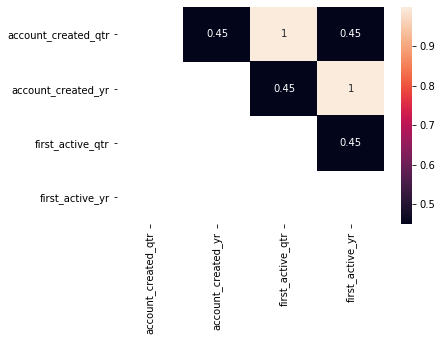

In [94]:

sns.heatmap(upper,annot=True)

In [95]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [96]:
for var in session.columns:
    if session[var].isnull().sum()>0:
        print(var,": ",session[var].isnull().sum()*100/len(session[var]),'%')

user_id :  0.32642750287975564 %
action :  0.7534820368826363 %
action_type :  10.657002535169072 %
action_detail :  10.657002535169072 %
secs_elapsed :  1.2872292336571207 %


In [97]:
session.user_id.nunique()

135483

In [98]:
session.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [99]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [100]:
session.loc[session['user_id']=='d1mm9tcy42','device_type'].value_counts()

Windows Desktop    122
-unknown-            5
Name: device_type, dtype: int64

In [101]:
train.loc[train['id']=='d1mm9tcy42','first_device_type'].value_counts()

Windows Desktop    1
Name: first_device_type, dtype: int64

In [102]:
session.action.value_counts()

show               2768278
index               843699
search_results      725226
personalize         706824
search              536057
                    ...   
sldf                     1
update_message           1
revert_to_admin          1
reactivate               1
deauthorize              1
Name: action, Length: 359, dtype: int64

In [103]:
#high cardinality
session.action.nunique()

359

In [104]:
session.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [105]:
#high cardinality
session.action_detail.nunique()

155

In [106]:
session.action_detail.value_counts()

view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
host_respond_page                 2
host_refund_guest                 2
tos_2014                          2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64

In [0]:
#session.action_detail.replace(to_replace='-unknown-',value='other',inplace=True)

In [108]:
session.groupby(['user_id'])['action'].nunique()

user_id
00023iyk9l    13
0010k6l0om    11
001wyh0pz8    10
0028jgx1x1     5
002qnbzfs5    25
              ..
zzxox7jnrx    28
zzy7t0y9cm     7
zzysuoqg6x     3
zzywmcn0jv    12
zzzlylp57e    19
Name: action, Length: 135483, dtype: int64

In [109]:
session.groupby(['user_id'])['action_type'].nunique()

user_id
00023iyk9l    6
0010k6l0om    5
001wyh0pz8    5
0028jgx1x1    5
002qnbzfs5    7
             ..
zzxox7jnrx    6
zzy7t0y9cm    4
zzysuoqg6x    3
zzywmcn0jv    6
zzzlylp57e    7
Name: action_type, Length: 135483, dtype: int64

In [0]:
session.loc[session.action_type=='-unknown-']='other'

In [0]:
action_type_count=session.groupby(['user_id', 'action_type'])['secs_elapsed'].agg(len).unstack()

In [122]:
action_type_count

action_type,booking_request,booking_response,click,data,message_post,modify,other,partner_callback,submit,view
user_id,,,,,,,,,,
00023iyk9l,1.0,NaN,4.0,9.0,1.0,NaN,NaN,1.0,NaN,21.0
0010k6l0om,NaN,NaN,16.0,9.0,NaN,NaN,NaN,1.0,NaN,17.0
001wyh0pz8,NaN,NaN,66.0,2.0,NaN,NaN,NaN,NaN,3.0,8.0
0028jgx1x1,NaN,NaN,9.0,5.0,NaN,NaN,NaN,NaN,1.0,15.0
002qnbzfs5,1.0,NaN,140.0,140.0,16.0,NaN,NaN,NaN,15.0,216.0
...,...,...,...,...,...,...,...,...,...,...
zzxox7jnrx,NaN,NaN,25.0,8.0,NaN,NaN,NaN,1.0,2.0,23.0
zzy7t0y9cm,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,1.0,1.0
zzysuoqg6x,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [135]:
for var in action_type_count.columns:
  if action_type_count[var].isnull().sum()>0:
    print(var,': ',action_type_count[var].isnull().sum()*100/len(action_type_count[var]),'%')

booking_request :  86.95814230869581 %
booking_response :  99.9970181519997 %
click :  16.195161951619514 %
data :  6.437064370643706 %
message_post :  67.32341868873235 %
modify :  99.66454209996645 %
other :  99.99925453799993 %
partner_callback :  89.24447426292444 %
submit :  6.416191434641619 %
view :  8.10689925081069 %


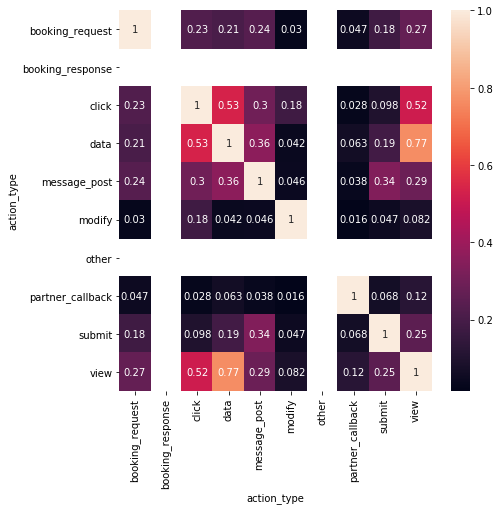

In [129]:
plt.figure(figsize=(7,7))
sns.heatmap(action_type_count.corr().abs(),annot=True)

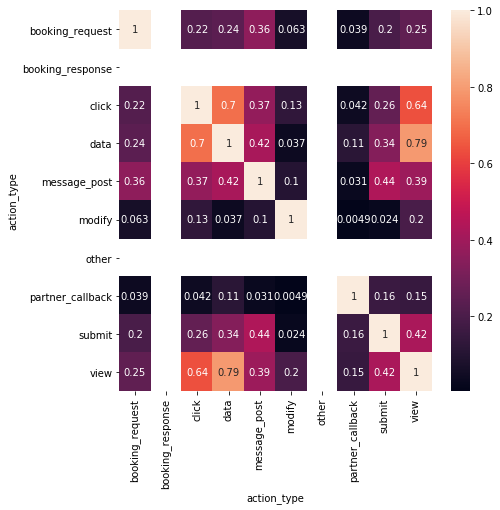

In [132]:
plt.figure(figsize=(7,7))
sns.heatmap(action_type_count.corr(method='spearman').abs(),annot=True)

In [111]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [112]:
session.groupby(['user_id', 'action_type'])['secs_elapsed'].agg(sum).unstack()

action_type,-unknown-,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view
user_id,,,,,,,,,,
00023iyk9l,NaN,0.0,NaN,590691.0,7043.0,129817.0,NaN,0.0,NaN,139368.0
0010k6l0om,123033.0,NaN,NaN,65954.0,136246.0,NaN,NaN,0.0,NaN,260196.0
001wyh0pz8,22181.0,NaN,NaN,158796.0,1550.0,NaN,NaN,NaN,50906.0,44516.0
0028jgx1x1,489.0,NaN,NaN,199802.0,8603.0,NaN,NaN,NaN,0.0,88116.0
002qnbzfs5,738169.0,70986.0,NaN,644323.0,293735.0,325235.0,NaN,NaN,1537719.0,284735.0
...,...,...,...,...,...,...,...,...,...,...
zzxox7jnrx,158451.0,NaN,NaN,213699.0,18040.0,NaN,NaN,0.0,118818.0,96235.0
zzy7t0y9cm,NaN,NaN,NaN,26280.0,46784.0,NaN,NaN,NaN,0.0,697.0
zzysuoqg6x,1533.0,NaN,NaN,NaN,198.0,NaN,NaN,NaN,0.0,NaN
